Existing weights found at mnist_cnn.pt. Press Enter to use them, or type 'r' to retrain:  


Loaded trained weights from mnist_cnn.pt


Enter test sample index (0-9999, default 0):  50


Prediction for sample 50: 6


Display the digit with matplotlib? [y/N]:  y


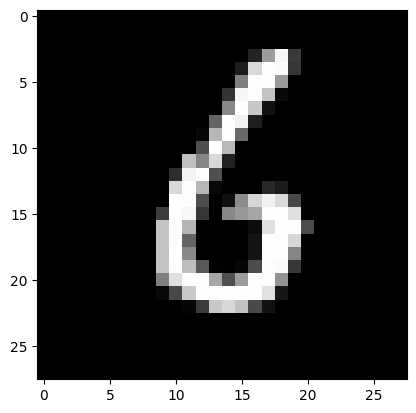

Classify another test sample? [y/N]:  n


In [1]:
from mnist import (
    MODEL_STATE_PATH,
    classify_test_sample,
    get_max_test_index,
    run_training_flow,
    show_sample_image,
)


def prompt_yes_no(message: str, default: bool = False) -> bool:
    """Read a yes/no response from stdin."""
    choice = input(message).strip().lower()
    if not choice:
        return default
    return choice in ("y", "yes")


def prompt_sample_index(max_index: int, default: int = 0) -> int:
    """Ask the user for a sample index and clamp the value to the dataset bounds."""
    while True:
        choice = input(
            f"Enter test sample index (0-{max_index}, default {default}): "
        ).strip()

        if not choice:
            return default

        try:
            value = int(choice)
            return max(0, min(value, max_index))
        except ValueError:
            print("Invalid input, please enter an integer.")


def maybe_retrain_model() -> None:
    """Decide whether to train fresh weights or reuse the last checkpoint."""
    retrain = True

    if MODEL_STATE_PATH.exists():
        choice = input(
            f"Existing weights found at {MODEL_STATE_PATH}. "
            "Press Enter to use them, or type 'r' to retrain: "
        ).strip().lower()
        retrain = choice == "r"
    else:
        print("No trained weights found, starting a new training run.")

    run_training_flow(retrain=retrain)


def inference_loop():
    """Continually classify user-selected test samples."""
    max_index = get_max_test_index()
    default_index = 0

    while True:
        sample_index = prompt_sample_index(max_index, default_index)
        result = classify_test_sample(sample_index)
        print(f"Prediction for sample {result['index']}: {result['prediction']}")

        if prompt_yes_no("Display the digit with matplotlib? [y/N]: "):
            show_sample_image(result["image"])

        if not prompt_yes_no("Classify another test sample? [y/N]: "):
            break


def main():
    maybe_retrain_model()
    inference_loop()


if __name__ == "__main__":
    main()